In [507]:
#import warnings
#warnings.filterwarnings('ignore')
#from tqdm import tqdm
#import random


In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os

In [509]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [510]:
#os.chdir()

In [511]:
# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/programmers/train_job/train.csv')
user_tags = pd.read_csv('/content/drive/MyDrive/programmers/train_job/user_tags.csv')
job_tags = pd.read_csv('/content/drive/MyDrive/programmers/train_job/job_tags.csv')
tags = pd.read_csv('/content/drive/MyDrive/programmers/train_job/tags.csv')
job_companies = pd.read_csv('/content/drive/MyDrive/programmers/train_job/job_companies.csv')


test_job = pd.read_csv('/content/drive/MyDrive/programmers/test_job.csv')
sample_output = pd.read_csv('/content/drive/MyDrive/programmers/sample_output_job.csv')

In [512]:
sample_output

,applied
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1


In [513]:
test_job

,userID,jobID
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4
...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca


In [514]:
train

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0
...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0


In [515]:
user_tags

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a
...,...,...
17189,3ab88dd28f749fe4ec90c0b6f9896eb5,801c14f07f9724229175b8ef8b4585a8
17190,3ab88dd28f749fe4ec90c0b6f9896eb5,95151403b0db4f75bfd8da0b393af853
17191,3ab88dd28f749fe4ec90c0b6f9896eb5,f47330643ae134ca204bf6b2481fec47
17192,15d84e9a5eceb67bcb8fb0e8c839a903,285f89b802bcb2651801455c86d78f2a


In [516]:
user_tags['userID'].value_counts() ## 196명의 개발자 유저 존재

f69054686ba46877b6397ccdb8f51762    572
eeedf6d4d717eba333e1b53f1b5375c8    447
0cc8f7bf8a8d56980414a6e4bc69cdc6    358
87c0a904d6f959e5ecbd0bdaa29d8be9    336
5585082ed1ea25eaf73052029f2161ce    325
                                   ... 
15d84e9a5eceb67bcb8fb0e8c839a903      5
37b96469b46dfd9919cd984b788ceb17      5
4611b8ff403bea67637c3f1911940668      5
68a61f9415f07a4040f7afe82a058608      5
4802630177809fcf861411501a443abb      4
Name: userID, Length: 196, dtype: int64

In [517]:
user_tags['tagID'].value_counts() ## 345개의 tag 존재

f47330643ae134ca204bf6b2481fec47    820
0e095e054ee94774d6a496099eb1cf6a    796
c8ba76c279269b1c6bc8a07e38e78fa4    701
2ba8698b79439589fdd2b0f7218d8b07    564
3948ead63a9f2944218de038d8934305    516
                                   ... 
5fa9e41bfec0725742cc9d15ef594120      1
0a09c8844ba8f0936c20bd791130d6b6      1
3c1e4bd67169b8153e0047536c9f541e      1
1a0a283bfe7c549dee6c638a05200e32      1
515ab26c135e92ed8bf3a594d67e4ade      1
Name: tagID, Length: 345, dtype: int64

In [518]:
user_tags.head()

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a


In [519]:
job_tags.head()

,jobID,tagID
0,320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
1,e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
2,e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
3,e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d
4,e820a45f1dfc7b95282d10b6087e11c0,6c8dba7d0df1c4a79dd07646be9a26c8


In [520]:
tags.head()

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python


In [521]:
job_companies.head()

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [522]:
job_companies.isna().sum() ## '회사 규모' 컬럼에 90개 결측치 존재

companyID       0
jobID           0
companySize    90
dtype: int64

In [523]:
job_companies['companySize'].fillna('N/a').value_counts()

11-50       260
51-100      142
1-10        100
N/a          90
101-200      60
201-500      56
1000 이상      13
501-1000     12
Name: companySize, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)


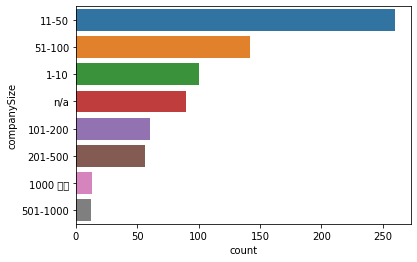

In [524]:
sns.countplot(y='companySize', data=job_companies.fillna('n/a'), order=job_companies.fillna('n/a')['companySize'].value_counts().index)

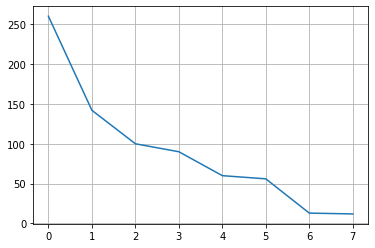

In [525]:
counts = job_companies['companySize'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [526]:
# 결측치 처리 및 이상치 처리


job_companies['companySize'] = job_companies['companySize'].fillna('others')


In [527]:
n_categorical = 6

others = counts[n_categorical:]
job_companies['companySize'] = job_companies['companySize'].apply(lambda s: s if str(s) not in others else 'others')

In [528]:
job_companies['companySize'].value_counts()

11-50      260
51-100     142
others     115
1-10       100
101-200     60
201-500     56
Name: companySize, dtype: int64

In [529]:
# 결측값 확인
train.isnull().sum()

userID     0
jobID      0
applied    0
dtype: int64

In [530]:
user_tags.isnull().sum()

userID    0
tagID     0
dtype: int64

In [531]:
job_tags.isnull().sum()

jobID    0
tagID    0
dtype: int64

In [532]:
tags.isnull().sum()

tagID      0
keyword    0
dtype: int64

In [533]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userID   6000 non-null   object
 1   jobID    6000 non-null   object
 2   applied  6000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


In [534]:
user_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17194 entries, 0 to 17193
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userID  17194 non-null  object
 1   tagID   17194 non-null  object
dtypes: object(2)
memory usage: 268.8+ KB


In [535]:
job_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   jobID   3477 non-null   object
 1   tagID   3477 non-null   object
dtypes: object(2)
memory usage: 54.5+ KB


In [536]:
# 컬럼 하나씩 보기
train['jobID'].value_counts()

96b9bff013acedfb1d140579e2fbeb63    50
da0d1111d2dc5d489242e60ebcbaf988    50
0f840be9b8db4d3fbd5ba2ce59211f55    48
69cb3ea317a32c4e6143e665fdb20b14    44
e5f6ad6ce374177eef023bf5d0c018b6    42
                                    ..
05f971b5ec196b8c65b75d2ef8267331     1
7bb060764a818184ebb1cc0d43d382aa     1
5680522b8e2bb01943234bce7bf84534     1
d86ea612dec96096c5e0fcc8dd42ab6d     1
92262bf907af914b95a0fc33c3f33bf6     1
Name: jobID, Length: 708, dtype: int64

In [537]:
train['jobID'].value_counts(normalize=True)*100 # 공고('jobID') 별 인기는 약 8배까지 차이 남

96b9bff013acedfb1d140579e2fbeb63    0.833333
da0d1111d2dc5d489242e60ebcbaf988    0.833333
0f840be9b8db4d3fbd5ba2ce59211f55    0.800000
69cb3ea317a32c4e6143e665fdb20b14    0.733333
e5f6ad6ce374177eef023bf5d0c018b6    0.700000
                                      ...   
05f971b5ec196b8c65b75d2ef8267331    0.016667
7bb060764a818184ebb1cc0d43d382aa    0.016667
5680522b8e2bb01943234bce7bf84534    0.016667
d86ea612dec96096c5e0fcc8dd42ab6d    0.016667
92262bf907af914b95a0fc33c3f33bf6    0.016667
Name: jobID, Length: 708, dtype: float64

In [538]:
job_tags['jobID'].value_counts() # 같은 공고가 여러번 있음 ??

e17184bcb70dcf3942c54e0b537ffc6d    17
27ed0fb950b856b06e1273989422e7d3    16
535ab76633d94208236a2e829ea6d888    16
68d13cf26c4b4f4f932e3eff990093ba    15
8fe0093bb30d6f8c31474bd0764e6ac0    13
                                    ..
934815ad542a4a7c5e8a2dfa04fea9f5     1
1bb91f73e9d31ea2830a5e73ce3ed328     1
019d385eb67632a7e958e23f24bd07d7     1
d296c101daa88a51f6ca8cfc1ac79b50     1
cd758e8f59dfdf06a852adad277986ca     1
Name: jobID, Length: 733, dtype: int64

In [539]:
job_tags['tagID'].value_counts()

0e095e054ee94774d6a496099eb1cf6a    219
f47330643ae134ca204bf6b2481fec47    197
4122cb13c7a474c1976c9706ae36521d    187
3948ead63a9f2944218de038d8934305    153
c8ba76c279269b1c6bc8a07e38e78fa4    143
                                   ... 
e6c2dc3dee4a51dcec3a876aa2339a78      1
076023edc9187cf1ac1f1163470e479a      1
0d7de1aca9299fe63f3e0041f02638a3      1
81e74d678581a3bb7a720b019f4f1a93      1
6a5889bb0190d0211a991f47bb19a777      1
Name: tagID, Length: 240, dtype: int64

In [540]:
job_tags['tagID'].value_counts(normalize=True)*100 # 공고job 별 관심사('tagID')는 차이가 더 큼

0e095e054ee94774d6a496099eb1cf6a    6.298533
f47330643ae134ca204bf6b2481fec47    5.665804
4122cb13c7a474c1976c9706ae36521d    5.378200
3948ead63a9f2944218de038d8934305    4.400345
c8ba76c279269b1c6bc8a07e38e78fa4    4.112741
                                      ...   
e6c2dc3dee4a51dcec3a876aa2339a78    0.028760
076023edc9187cf1ac1f1163470e479a    0.028760
0d7de1aca9299fe63f3e0041f02638a3    0.028760
81e74d678581a3bb7a720b019f4f1a93    0.028760
6a5889bb0190d0211a991f47bb19a777    0.028760
Name: tagID, Length: 240, dtype: float64

In [541]:
len(user_tags['userID'].unique()) # 중복 제외하면 '개발자'는 총 196 명 (데이터는 총 17194 개)

196

In [542]:
len(user_tags['tagID'].unique()) # 중복 제외하면 '관심사 키워드'는 총 345 개 (데이터는 총 17194 개)

345

In [543]:
user_tags['tagID'].value_counts()

f47330643ae134ca204bf6b2481fec47    820
0e095e054ee94774d6a496099eb1cf6a    796
c8ba76c279269b1c6bc8a07e38e78fa4    701
2ba8698b79439589fdd2b0f7218d8b07    564
3948ead63a9f2944218de038d8934305    516
                                   ... 
5fa9e41bfec0725742cc9d15ef594120      1
0a09c8844ba8f0936c20bd791130d6b6      1
3c1e4bd67169b8153e0047536c9f541e      1
1a0a283bfe7c549dee6c638a05200e32      1
515ab26c135e92ed8bf3a594d67e4ade      1
Name: tagID, Length: 345, dtype: int64

In [544]:
user_tags['tagID'].value_counts(normalize=True)*100 # 개발자user 별 관심사('tagID')도 차이 큼

f47330643ae134ca204bf6b2481fec47    4.769106
0e095e054ee94774d6a496099eb1cf6a    4.629522
c8ba76c279269b1c6bc8a07e38e78fa4    4.077004
2ba8698b79439589fdd2b0f7218d8b07    3.280214
3948ead63a9f2944218de038d8934305    3.001047
                                      ...   
5fa9e41bfec0725742cc9d15ef594120    0.005816
0a09c8844ba8f0936c20bd791130d6b6    0.005816
3c1e4bd67169b8153e0047536c9f541e    0.005816
1a0a283bfe7c549dee6c638a05200e32    0.005816
515ab26c135e92ed8bf3a594d67e4ade    0.005816
Name: tagID, Length: 345, dtype: float64

In [545]:
user_tags['userID'].value_counts() # 중복 지원한 '개발자' 있음 => 최대 572 번 지원??

f69054686ba46877b6397ccdb8f51762    572
eeedf6d4d717eba333e1b53f1b5375c8    447
0cc8f7bf8a8d56980414a6e4bc69cdc6    358
87c0a904d6f959e5ecbd0bdaa29d8be9    336
5585082ed1ea25eaf73052029f2161ce    325
                                   ... 
15d84e9a5eceb67bcb8fb0e8c839a903      5
37b96469b46dfd9919cd984b788ceb17      5
4611b8ff403bea67637c3f1911940668      5
68a61f9415f07a4040f7afe82a058608      5
4802630177809fcf861411501a443abb      4
Name: userID, Length: 196, dtype: int64

In [546]:
# reset_index()
#train2 = train('userID').reset_index()
#train2

# 서로 다른 엑셀에 저장되어 있는 데이터 하나의 train.csv에 결합하기

In [547]:
train.columns

Index(['userID', 'jobID', 'applied'], dtype='object')

- user_tags.csv 정보 결합

In [548]:
user_tags.columns

Index(['userID', 'tagID'], dtype='object')

In [549]:
train['user_tags'] = ''

for u, t in zip(user_tags['userID'].values, user_tags['tagID'].values):
    train.loc[(train['userID']== u), 'user_tags'] = t

In [550]:
train

,userID,jobID,applied,user_tags
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,4122cb13c7a474c1976c9706ae36521d
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,fe70c36866add1572a8e2b96bfede7bf
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,f91e24dfe80012e2a7984afa4480a6d6
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,3948ead63a9f2944218de038d8934305
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,81e5f81db77c596492e6f1a5a792ed53
...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,c88d8d0a6097754525e02c2246d8d27f
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,7bccfde7714a1ebadf06c5f4cea752c1
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,f47330643ae134ca204bf6b2481fec47
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,884d79963bd8bc0ae9b13a1aa71add73


- job_tags.csv 정보 결합

In [551]:
job_tags.columns

Index(['jobID', 'tagID'], dtype='object')

In [552]:
train['job_tags'] = ''

for j, t in zip(job_tags['jobID'].values, job_tags['tagID'].values):
    train.loc[(train['jobID'] == j), 'job_tags'] = t

In [553]:
train

,userID,jobID,applied,user_tags,job_tags
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,4122cb13c7a474c1976c9706ae36521d,d38901788c533e8286cb6400b40b386d
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,fe70c36866add1572a8e2b96bfede7bf,c8ba76c279269b1c6bc8a07e38e78fa4
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,f91e24dfe80012e2a7984afa4480a6d6,6eb6e75fddec0218351dc5c0c8464104
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,3948ead63a9f2944218de038d8934305,6c8dba7d0df1c4a79dd07646be9a26c8
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,81e5f81db77c596492e6f1a5a792ed53,8e2cfdc275761edc592f73a076197c33
...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,c88d8d0a6097754525e02c2246d8d27f,0e095e054ee94774d6a496099eb1cf6a
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,7bccfde7714a1ebadf06c5f4cea752c1,0e095e054ee94774d6a496099eb1cf6a
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,f47330643ae134ca204bf6b2481fec47,4e2545f819e67f0615003dd7e04a6087
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,884d79963bd8bc0ae9b13a1aa71add73,8e2cfdc275761edc592f73a076197c33


- job_companies.csv 정보 결합

In [554]:
job_companies.columns

Index(['companyID', 'jobID', 'companySize'], dtype='object')

In [555]:
train['companyID'] = ''
train['companySize'] = ''


for ci, j, cs in zip(job_companies['companyID'].values, job_companies['jobID'].values, job_companies['companySize'].values):
    train.loc[(train['jobID'] == j), 'companyID'] = ci
    train.loc[(train['jobID'] == j), 'companySize'] = cs

In [556]:
train

,userID,jobID,applied,user_tags,job_tags,companyID,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,4122cb13c7a474c1976c9706ae36521d,d38901788c533e8286cb6400b40b386d,4f6ffe13a5d75b2d6a3923922b3922e5,11-50
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,fe70c36866add1572a8e2b96bfede7bf,c8ba76c279269b1c6bc8a07e38e78fa4,846c260d715e5b854ffad5f70a516c88,101-200
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,f91e24dfe80012e2a7984afa4480a6d6,6eb6e75fddec0218351dc5c0c8464104,edfbe1afcf9246bb0d40eb4d8027d90f,others
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,3948ead63a9f2944218de038d8934305,6c8dba7d0df1c4a79dd07646be9a26c8,884d79963bd8bc0ae9b13a1aa71add73,11-50
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,81e5f81db77c596492e6f1a5a792ed53,8e2cfdc275761edc592f73a076197c33,b5dc4e5d9b495d0196f61d45b26ef33e,51-100
...,...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,c88d8d0a6097754525e02c2246d8d27f,0e095e054ee94774d6a496099eb1cf6a,17c276c8e723eb46aef576537e9d56d0,11-50
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,7bccfde7714a1ebadf06c5f4cea752c1,0e095e054ee94774d6a496099eb1cf6a,68ce199ec2c5517597ce0a4d89620f55,51-100
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,f47330643ae134ca204bf6b2481fec47,4e2545f819e67f0615003dd7e04a6087,43dd49b4fdb9bede653e94468ff8df1e,101-200
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,884d79963bd8bc0ae9b13a1aa71add73,8e2cfdc275761edc592f73a076197c33,f33ba15effa5c10e873bf3842afb46a6,51-100


- user_tags와 job_tags 일련번호를 keyword 값으로 변경 (tags.csv)

In [557]:
tags

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python
...,...,...
882,818f4654ed39a1c147d1e51a00ffb4cb,활용
883,7cce53cf90577442771720a370c3c723,mybais
884,c2aee86157b4a40b78132f1e71a9e6f1,*
885,1fb2a1c37b18aa4611c3949d6148d0f8,Autodesk Maya


In [558]:
train.columns

Index(['userID', 'jobID', 'applied', 'user_tags', 'job_tags', 'companyID',
       'companySize'],
      dtype='object')

In [559]:
for tag, key in zip(tags['tagID'].values, tags['keyword'].values):
    train.loc[(train['user_tags']==tag), 'user_tags'] = key # 단어로 값 변경
    train.loc[(train['job_tags']==tag), 'job_tags'] = key # 단어로 값 변경

In [560]:
train

,userID,jobID,applied,user_tags,job_tags,companyID,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,Python,Ruby,4f6ffe13a5d75b2d6a3923922b3922e5,11-50
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,Kibana,MySQL,846c260d715e5b854ffad5f70a516c88,101-200
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,Raspberry Pi,iOS,edfbe1afcf9246bb0d40eb4d8027d90f,others
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,Node.js,Vue.js,884d79963bd8bc0ae9b13a1aa71add73,11-50
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,Spring Boot,Webpack,b5dc4e5d9b495d0196f61d45b26ef33e,51-100
...,...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,MyBatis,JavaScript,17c276c8e723eb46aef576537e9d56d0,11-50
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,Redux.js,JavaScript,68ce199ec2c5517597ce0a4d89620f55,51-100
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,Java,AWS EC2,43dd49b4fdb9bede653e94468ff8df1e,101-200
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,Git,Webpack,f33ba15effa5c10e873bf3842afb46a6,51-100


In [561]:
train.isna().sum() ## 결측치 없음 -> Okay

userID         0
jobID          0
applied        0
user_tags      0
job_tags       0
companyID      0
companySize    0
dtype: int64

## test 데이터에도 똑같이 적용

In [562]:
test_job = pd.read_csv('/content/drive/MyDrive/programmers/test_job.csv')

In [563]:
test_job.columns

Index(['userID', 'jobID'], dtype='object')

- user_tags.csv 정보 결합

In [564]:
user_tags.columns

Index(['userID', 'tagID'], dtype='object')

In [565]:
test_job['user_tags'] = ''

for u, t in zip(user_tags['userID'].values, user_tags['tagID'].values):
    test_job.loc[(test_job['userID']== u), 'user_tags'] = t

In [566]:
test_job

,userID,jobID,user_tags
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,1e1d184167ca7676cf665225e236a3d2
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,e702e51da2c0f5be4dd354bb3e295d37
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,7d771e0e8f3633ab54856925ecdefc5d
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,2ba8698b79439589fdd2b0f7218d8b07
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,4e2545f819e67f0615003dd7e04a6087
...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,2ba8698b79439589fdd2b0f7218d8b07
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,8a3363abe792db2d8761d6403605aeb7
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,bd4c9ab730f5513206b999ec0d90d1fb
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,8a3363abe792db2d8761d6403605aeb7


- job_tags.csv 정보 결합

In [567]:
job_tags.columns

Index(['jobID', 'tagID'], dtype='object')

In [568]:
test_job['job_tags'] = ''

for j, t in zip(job_tags['jobID'].values, job_tags['tagID'].values):
    test_job.loc[(test_job['jobID'] == j), 'job_tags'] = t

In [569]:
test_job

,userID,jobID,user_tags,job_tags
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,1e1d184167ca7676cf665225e236a3d2,cd758e8f59dfdf06a852adad277986ca
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,e702e51da2c0f5be4dd354bb3e295d37,9701a1c165dd9420816bfec5edd6c2b1
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,7d771e0e8f3633ab54856925ecdefc5d,cd758e8f59dfdf06a852adad277986ca
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,2ba8698b79439589fdd2b0f7218d8b07,0e095e054ee94774d6a496099eb1cf6a
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,4e2545f819e67f0615003dd7e04a6087,884d79963bd8bc0ae9b13a1aa71add73
...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,2ba8698b79439589fdd2b0f7218d8b07,4122cb13c7a474c1976c9706ae36521d
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,8a3363abe792db2d8761d6403605aeb7,8a3363abe792db2d8761d6403605aeb7
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,bd4c9ab730f5513206b999ec0d90d1fb,38ca89564b2259401518960f7a06f94b
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,8a3363abe792db2d8761d6403605aeb7,9a3d458322d70046f63dfd8b0153ece4


- job_companies.csv 정보 결합

In [570]:
job_companies.columns

Index(['companyID', 'jobID', 'companySize'], dtype='object')

In [571]:
test_job['companyID'] = ''
test_job['companySize'] = ''


for ci, j, cs in zip(job_companies['companyID'].values, job_companies['jobID'].values, job_companies['companySize'].values):
    test_job.loc[(test_job['jobID'] == j), 'companyID'] = ci
    test_job.loc[(test_job['jobID'] == j), 'companySize'] = cs

In [572]:
test_job

,userID,jobID,user_tags,job_tags,companyID,companySize
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,1e1d184167ca7676cf665225e236a3d2,cd758e8f59dfdf06a852adad277986ca,b51a15f382ac914391a58850ab343b00,11-50
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,e702e51da2c0f5be4dd354bb3e295d37,9701a1c165dd9420816bfec5edd6c2b1,9f396fe44e7c05c16873b05ec425cbad,51-100
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,7d771e0e8f3633ab54856925ecdefc5d,cd758e8f59dfdf06a852adad277986ca,68053af2923e00204c3ca7c6a3150cf7,11-50
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,2ba8698b79439589fdd2b0f7218d8b07,0e095e054ee94774d6a496099eb1cf6a,3b5dca501ee1e6d8cd7b905f4e1bf723,11-50
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,4e2545f819e67f0615003dd7e04a6087,884d79963bd8bc0ae9b13a1aa71add73,d961e9f236177d65d21100592edb0769,11-50
...,...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,2ba8698b79439589fdd2b0f7218d8b07,4122cb13c7a474c1976c9706ae36521d,3b8a614226a953a8cd9526fca6fe9ba5,201-500
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,8a3363abe792db2d8761d6403605aeb7,8a3363abe792db2d8761d6403605aeb7,d7322ed717dedf1eb4e6e52a37ea7bcd,others
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,bd4c9ab730f5513206b999ec0d90d1fb,38ca89564b2259401518960f7a06f94b,7b5b23f4aadf9513306bcd59afb6e4c9,11-50
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,8a3363abe792db2d8761d6403605aeb7,9a3d458322d70046f63dfd8b0153ece4,ec8ce6abb3e952a85b8551ba726a1227,11-50


- user_tags와 job_tags 일련번호를 keyword 값으로 변경 (tags.csv)

In [573]:
tags

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python
...,...,...
882,818f4654ed39a1c147d1e51a00ffb4cb,활용
883,7cce53cf90577442771720a370c3c723,mybais
884,c2aee86157b4a40b78132f1e71a9e6f1,*
885,1fb2a1c37b18aa4611c3949d6148d0f8,Autodesk Maya


In [574]:
test_job.columns

Index(['userID', 'jobID', 'user_tags', 'job_tags', 'companyID', 'companySize'], dtype='object')

In [575]:
for tag, key in zip(tags['tagID'].values, tags['keyword'].values):
    test_job.loc[(test_job['user_tags']==tag), 'user_tags'] = key # 단어로 값 변경
    test_job.loc[(test_job['job_tags']==tag), 'job_tags'] = key # 단어로 값 변경

In [576]:
test_job

,userID,jobID,user_tags,job_tags,companyID,companySize
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,GraphQL,TypeScript,b51a15f382ac914391a58850ab343b00,11-50
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,C,Nginx,9f396fe44e7c05c16873b05ec425cbad,51-100
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,HTML,TypeScript,68053af2923e00204c3ca7c6a3150cf7,11-50
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,Spring,JavaScript,3b5dca501ee1e6d8cd7b905f4e1bf723,11-50
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,AWS EC2,Git,d961e9f236177d65d21100592edb0769,11-50
...,...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,Spring,Python,3b8a614226a953a8cd9526fca6fe9ba5,201-500
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,Django,Django,d7322ed717dedf1eb4e6e52a37ea7bcd,others
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,REST API,GitHub,7b5b23f4aadf9513306bcd59afb6e4c9,11-50
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,Django,Kotlin,ec8ce6abb3e952a85b8551ba726a1227,11-50


In [577]:
test_job.isna().sum() ## 결측치 없음 -> Okay

userID         0
jobID          0
user_tags      0
job_tags       0
companyID      0
companySize    0
dtype: int64

## 차원 축소를 위한 범주형 데이터 시각화 및 처리

In [578]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userID       6000 non-null   object
 1   jobID        6000 non-null   object
 2   applied      6000 non-null   int64 
 3   user_tags    6000 non-null   object
 4   job_tags     6000 non-null   object
 5   companyID    6000 non-null   object
 6   companySize  6000 non-null   object
dtypes: int64(1), object(6)
memory usage: 328.2+ KB


In [579]:
train.columns

Index(['userID', 'jobID', 'applied', 'user_tags', 'job_tags', 'companyID',
       'companySize'],
      dtype='object')

In [580]:
categorical_columns = ['userID', 'jobID', 'user_tags', 'job_tags', 'companyID', 'companySize'] # y data 'applied'만 수치형

for c in categorical_columns:
    print('-------' + c + '-------')
    print(train[c].value_counts())
    print()

-------userID-------
b052e2e0c0ad1b2d5036bd56e27d061c    106
6bc5d37951120d6d49672ce647c4e563     95
d41e0e6f6f1e29098d9d152511503ab2     93
8c19f571e251e61cb8dd3612f26d5ecf     86
42c2cc0b74b0f4a3a7e52d1ff617e05e     85
                                   ... 
d52d50218e9abe66438cefaee22a28da      9
0e010fbd16cca07dc2c06d8745c0709a      9
3edc356b112be4cda9472f2e37549e7d      8
624e7e301007d8d328d40f56c948a8ba      6
015b469419f616144c13e0194f880af7      2
Name: userID, Length: 196, dtype: int64

-------jobID-------
96b9bff013acedfb1d140579e2fbeb63    50
da0d1111d2dc5d489242e60ebcbaf988    50
0f840be9b8db4d3fbd5ba2ce59211f55    48
69cb3ea317a32c4e6143e665fdb20b14    44
e5f6ad6ce374177eef023bf5d0c018b6    42
                                    ..
05f971b5ec196b8c65b75d2ef8267331     1
7bb060764a818184ebb1cc0d43d382aa     1
5680522b8e2bb01943234bce7bf84534     1
d86ea612dec96096c5e0fcc8dd42ab6d     1
92262bf907af914b95a0fc33c3f33bf6     1
Name: jobID, Length: 708, dtype: int64

-------us

- userID

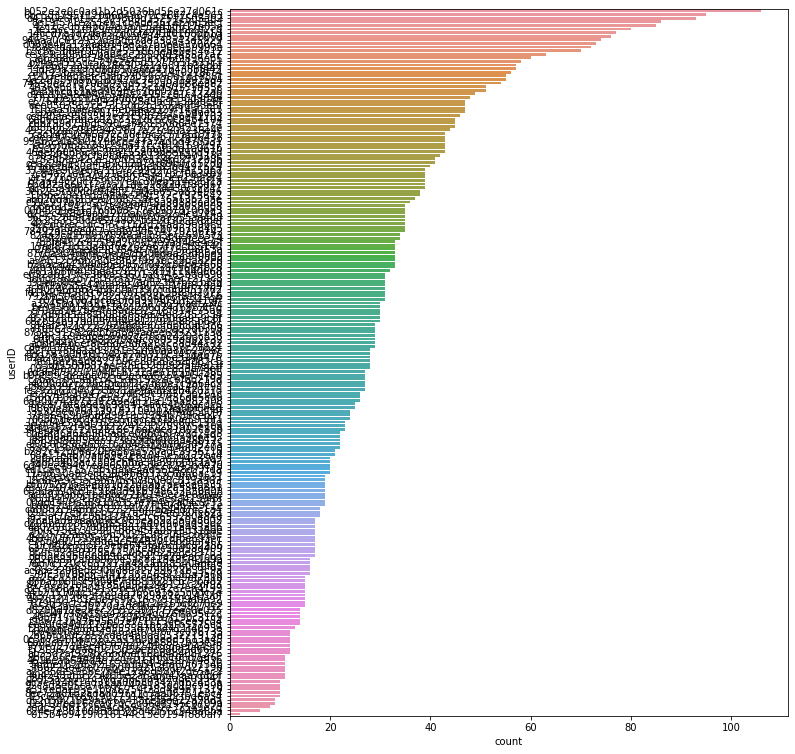

In [581]:
fig = plt.figure(figsize=(10, 13))
sns.countplot(y='userID', data=train, order=train['userID'].value_counts().index)

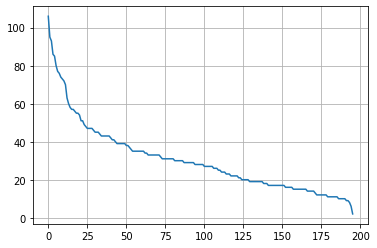

In [582]:
col = 'userID'
counts = train[col].value_counts()


plt.plot(range(len(counts)), counts)
plt.grid()

In [583]:
a = train['userID'].unique()
len(a)

196

In [584]:
b = test_job['userID'].unique()
len(b) ## 일치함으로 pass

196

- jobID

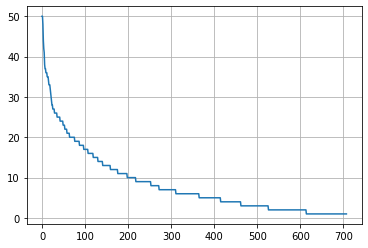

In [585]:
col = 'jobID'
counts = train[col].value_counts()


plt.plot(range(len(counts)), counts)
plt.grid()

In [586]:
n_categorical = 200
others = counts.index[n_categorical:]

train[col] = train[col].apply(lambda s: s if str(s) not in others else 'others')

In [587]:
train[col].value_counts()

others                              2144
da0d1111d2dc5d489242e60ebcbaf988      50
96b9bff013acedfb1d140579e2fbeb63      50
0f840be9b8db4d3fbd5ba2ce59211f55      48
69cb3ea317a32c4e6143e665fdb20b14      44
                                    ... 
c3992e9a68c5ae12bd18488bc579b30d      11
6cfe0e6127fa25df2a0ef2ae1067d915      11
b83aac23b9528732c23cc7352950e880      11
55743cc0393b1cb4b8b37d09ae48d097      10
0537fb40a68c18da59a35c2bfe1ca554      10
Name: jobID, Length: 201, dtype: int64

In [588]:
a = train['jobID'].unique()
len(a)

201

In [589]:
b = test_job['jobID'].unique()
len(b) ## 일치함으로 pass

591

In [590]:
cnt = 0

for elem in b:
  if elem not in a:
    print(elem)
    cnt += 1

352407221afb776e3143e8a1a0577885
ccb0989662211f61edae2e26d58ea92f
285f89b802bcb2651801455c86d78f2a
6766aa2750c19aad2fa1b32f36ed4aee
dc82d632c9fcecb0778afbc7924494a6
647bba344396e7c8170902bcf2e15551
aa169b49b583a2b5af89203c2b78c67c
bf62768ca46b6c3b5bea9515d1a1fc45
a760880003e7ddedfef56acb3b09697f
fa14d4fe2f19414de3ebd9f63d5c0169
062ddb6c727310e76b6200b7c71f63b5
0fcbc61acd0479dc77e3cccc0f5ffca7
e17184bcb70dcf3942c54e0b537ffc6d
298f95e1bf9136124592c8d4825a06fc
320722549d1751cf3f247855f937b982
b6f0479ae87d244975439c6124592772
9996535e07258a7bbfd8b132435c5962
abd815286ba1007abfbb8415b83ae2cf
fd06b8ea02fe5b1c2496fe1700e9d16c
fe7ee8fc1959cc7214fa21c4840dff0a
ef4e3b775c934dada217712d76f3d51f
35cf8659cfcb13224cbd47863a34fc58
dabd8d2ce74e782c65a973ef76fd540b
310ce61c90f3a46e340ee8257bc70e93
9b72e31dac81715466cd580a448cf823
3c7781a36bcd6cf08c11a970fbe0e2a6
99c5e07b4d5de9d18c350cdf64c5aa3d
8b4066554730ddfaa0266346bdc1b202
00ec53c4682d36f5c4359f4ae7bd7ba1
44c4c17332cace2124a1a836d9fc4b6f
ec5aa0b784

In [591]:
print(cnt)

393


In [592]:
new_test_jobID = []

for elem in test_job['jobID']:
  if elem not in a:
    new_test_jobID.append('others')
  else:
    new_test_jobID.append(elem)


test_job['jobID'] = new_test_jobID # 교체

In [593]:
test_job['jobID'].value_counts()

others                              974
da0d1111d2dc5d489242e60ebcbaf988     24
f90f2aca5c640289d0a29417bcb63a37     19
e5f6ad6ce374177eef023bf5d0c018b6     18
13f9896df61279c928f19721878fac41     18
                                   ... 
f5f8590cd58a54e94377e6ae2eded4d9      2
aa942ab2bfa6ebda4840e7360ce6e7ef      1
11b921ef080f7736089c757404650e40      1
53adaf494dc89ef7196d73636eb2451b      1
f4f6dce2f3a0f9dada0c2b5b66452017      1
Name: jobID, Length: 199, dtype: int64

- user_tags

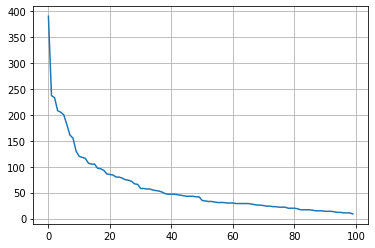

In [594]:
col = 'user_tags'
counts = train[col].value_counts()


plt.plot(range(len(counts)), counts)
plt.grid()

In [595]:
n_categorical = 50
others = counts.index[n_categorical:]

train[col] = train[col].apply(lambda s: s if str(s) not in others else 'others')

In [596]:
train[col].value_counts()

others                              1116
JavaScript                           390
Git                                  237
Java                                 233
JSP                                  208
Node.js                              205
C                                    200
C#                                   181
Android                              161
MySQL                                155
Oracle                               130
MongoDB                              120
PHP                                  118
Spring                               116
CSS                                  107
Python                               105
AWS EC2                              105
centOS                                97
ReactJS                               96
Flask                                 93
OpenCV                                86
MyBatis                               85
Django                                84
Zeplin                                80
Redux.js        

In [597]:
a = train['user_tags'].unique()
len(a)

51

In [598]:
b = test_job['user_tags'].unique()
len(b) ## 일치함으로 pass

100

In [599]:
cnt = 0

for elem in b:
  if elem not in a:
    print(elem)
    cnt += 1

H2 Database
Naver API
PWA(Progressive Web App)
Java Servlet
Spring Batch
MATLAB
Pug
Sass(SCSS)
Docker
Sketch
Sequelize.js
Angular
Webpack
SQL
Raspberry Pi
Ajax
Polymer Project
MFC
Spring REST Docs
BLE(Bluetooth Low Energy)
Google Geolocation API
Akka.NET
Spring Data JPA
Nginx
MobX
Google Cloud Firestore
Firebase
SockJS
Google Cloud Tools for Eclipse
CSS3
Jenkins
Elasticsearch
Spring Security
Apache Tomcat
AWS Lightsail
AWS Elastic Beanstalk
JWT
Angular5
SQLite
Kibana
Apache
Google Maps API
Apache Spark
IOCP
HTML5
React Native
WordPress
JIRA
Shell
Unity


In [600]:
print(cnt)

50


In [601]:
new_test_usertags = []

for elem in test_job['user_tags']:
  if elem not in a:
    new_test_usertags.append('others')
  else:
    new_test_usertags.append(elem)


test_job['user_tags'] = new_test_usertags # 교체

In [602]:
test_job['user_tags'].value_counts()

others                              481
JavaScript                          125
Git                                 102
Node.js                              90
JSP                                  87
C                                    85
Java                                 74
MySQL                                67
MongoDB                              66
C#                                   63
Android                              54
Django                               48
CSS                                  47
Spring                               44
ReactJS                              43
Oracle                               42
Tensorflow                           42
Python                               39
Linux                                39
AWS EC2                              38
PHP                                  38
OpenCV                               37
TypeScript                           36
HTML                                 36
centOS                               35


In [603]:
# 중간 체크

categorical_columns = ['userID', 'jobID', 'user_tags', 'job_tags', 'companyID', 'companySize'] # y data 'applied'만 수치형

for c in categorical_columns:
    print('-------' + c + '-------')
    print(train[c].value_counts())
    print(len(train[c].value_counts()))
    print()

-------userID-------
b052e2e0c0ad1b2d5036bd56e27d061c    106
6bc5d37951120d6d49672ce647c4e563     95
d41e0e6f6f1e29098d9d152511503ab2     93
8c19f571e251e61cb8dd3612f26d5ecf     86
42c2cc0b74b0f4a3a7e52d1ff617e05e     85
                                   ... 
d52d50218e9abe66438cefaee22a28da      9
0e010fbd16cca07dc2c06d8745c0709a      9
3edc356b112be4cda9472f2e37549e7d      8
624e7e301007d8d328d40f56c948a8ba      6
015b469419f616144c13e0194f880af7      2
Name: userID, Length: 196, dtype: int64
196

-------jobID-------
others                              2144
da0d1111d2dc5d489242e60ebcbaf988      50
96b9bff013acedfb1d140579e2fbeb63      50
0f840be9b8db4d3fbd5ba2ce59211f55      48
69cb3ea317a32c4e6143e665fdb20b14      44
                                    ... 
c3992e9a68c5ae12bd18488bc579b30d      11
6cfe0e6127fa25df2a0ef2ae1067d915      11
b83aac23b9528732c23cc7352950e880      11
55743cc0393b1cb4b8b37d09ae48d097      10
0537fb40a68c18da59a35c2bfe1ca554      10
Name: jobID, Length: 20

- job_tags

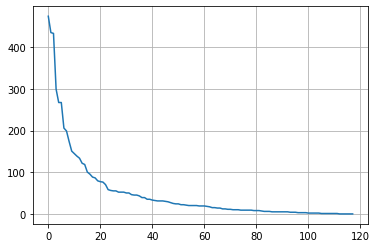

In [604]:
col = 'job_tags'
counts = train[col].value_counts()

plt.plot(range(len(counts)), counts)
plt.grid()

In [605]:
n_categorical = 25
others = counts[n_categorical:].index

train[col] = train[col].apply(lambda s: s if str(s) not in others else 'others')

In [606]:
train[col].value_counts()

others                      1644
Java                         473
JavaScript                   434
Python                       432
Node.js                      299
HTML                         267
Spring                       267
MySQL                        206
Git                          199
Docker                       174
ReactJS                      151
Amazon Web Services(AWS)     145
Vue.js                       139
Ruby on Rails                134
PHP                          122
TypeScript                   119
ES6                          101
Django                        96
CSS                           89
C#                            87
Android                       80
C++                           78
Redux-Saga                    77
Ruby                          71
Kotlin                        59
Webpack                       57
Name: job_tags, dtype: int64

In [607]:
a = train[col].unique()

new_test = []

for elem in test_job[col]:
  if elem not in a:
    new_test.append('others')
  else:
    new_test.append(elem)


test_job[col] = new_test # 교체

In [608]:
test_job[col].value_counts()

others                      669
Java                        193
Python                      171
JavaScript                  168
Spring                      134
Node.js                     131
HTML                        100
MySQL                        84
Git                          79
ReactJS                      74
Docker                       68
Ruby on Rails                63
Vue.js                       53
Amazon Web Services(AWS)     51
ES6                          51
TypeScript                   48
PHP                          45
C++                          42
Django                       38
CSS                          33
C#                           26
Android                      24
Webpack                      23
Ruby                         23
Redux-Saga                   23
Kotlin                       21
Name: job_tags, dtype: int64

- companyID

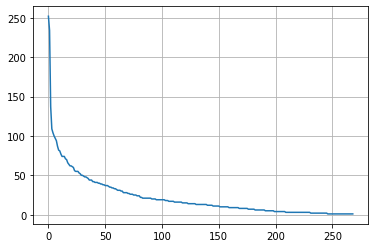

In [609]:
col = 'companyID'
counts = train[col].value_counts()

plt.plot(range(len(counts)), counts)
plt.grid()

In [610]:
n_categorical = 60
others = counts[n_categorical:].index

train[col] = train[col].apply(lambda s: s if str(s) not in others else 'others')

In [611]:
train[col].value_counts()

others                              2220
3b8a614226a953a8cd9526fca6fe9ba5     252
4f6ffe13a5d75b2d6a3923922b3922e5     234
3328bdf9a4b9504b9398284244fe97c2     137
c058f544c737782deacefa532d9add4c     109
                                    ... 
9a1756fd0c741126d7bbd4b692ccbd91      35
6d9cb7de5e8ac30bd5e8734bc96a35c1      34
a67f096809415ca1c9f112d96d27689b      34
13f320e7b5ead1024ac95c3b208610db      33
facf9f743b083008a894eee7baa16469      33
Name: companyID, Length: 61, dtype: int64

In [612]:
a = train[col].unique()

new_test = []

for elem in test_job[col]:
  if elem not in a:
    new_test.append('others')
  else:
    new_test.append(elem)


test_job[col] = new_test # 교체

In [613]:
test_job[col].value_counts()

others                              929
3b8a614226a953a8cd9526fca6fe9ba5    108
4f6ffe13a5d75b2d6a3923922b3922e5     93
3328bdf9a4b9504b9398284244fe97c2     48
eddea82ad2755b24c4e168c5fc2ebd40     42
                                   ... 
7eb3c8be3d411e8ebfab08eba5f49632     12
4f87658ef0de194413056248a00ce009     12
facf9f743b083008a894eee7baa16469     10
6d9cb7de5e8ac30bd5e8734bc96a35c1     10
9a1756fd0c741126d7bbd4b692ccbd91      7
Name: companyID, Length: 61, dtype: int64

- companySize

In [614]:
col = 'companySize'

a = train[col].unique()

new_test = []

for elem in test_job[col]:
  if elem not in a:
    new_test.append('others')
  else:
    new_test.append(elem)


test_job[col] = new_test # 교체

In [615]:
test_job[col].value_counts()

11-50      950
51-100     415
others     332
1-10       322
101-200    215
201-500    201
Name: companySize, dtype: int64

In [616]:
# test 데이터 불러오기 및 합치기

In [617]:
test_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userID       2435 non-null   object
 1   jobID        2435 non-null   object
 2   user_tags    2435 non-null   object
 3   job_tags     2435 non-null   object
 4   companyID    2435 non-null   object
 5   companySize  2435 non-null   object
dtypes: object(6)
memory usage: 114.3+ KB


In [618]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userID       6000 non-null   object
 1   jobID        6000 non-null   object
 2   applied      6000 non-null   int64 
 3   user_tags    6000 non-null   object
 4   job_tags     6000 non-null   object
 5   companyID    6000 non-null   object
 6   companySize  6000 non-null   object
dtypes: int64(1), object(6)
memory usage: 328.2+ KB


## (추가 처리) test_job.csv에 없는 데이터 train에서 행 drop 처리

In [619]:
for c in categorical_columns:
    print('----------------')
    temp = train[c]
    val = test_job[c]

    for elem in temp:
      if elem not in val:
        print(elem)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
others
11-50
1-10
51-100
others
11-50
11-50
11-50
1-10
others
11-50
others
others
others
1-10
11-50
11-50
1-10
51-100
1-10
51-100
11-50
others
11-50
51-100
51-100
others
51-100
others
51-100
11-50
51-100
others
11-50
others
11-50
51-100
others
1-10
201-500
51-100
11-50
51-100
11-50
11-50
51-100
201-500
11-50
201-500
11-50
101-200
201-500
101-200
11-50
11-50
11-50
others
101-200
1-10
51-100
11-50
11-50
101-200
11-50
1-10
1-10
1-10
101-200
11-50
others
11-50
51-100
11-50
101-200
others
11-50
others
101-200
11-50
11-50
11-50
101-200
51-100
11-50
11-50
11-50
11-50
11-50
11-50
201-500
1-10
others
201-500
11-50
11-50
51-100
11-50
11-50
11-50
51-100
others
51-100
201-500
1-10
11-50
others
201-500
11-50
201-500
101-200
11-50
11-50
others
11-50
201-500
1-10
1-10
11-50
11-50
1-10
51-100
201-500
others
101-200
11-50
201-500
201-500
11-50
others
51-100
1-10
11-50
201-500
others
11-50
201-500
11-50
11-50
11-50
201-500
11-50
51-100
51-100
11-50
others
11-50
1-10
o

In [620]:
for c in categorical_columns:
  print('------'+ c +'------')
  tr = train[c].value_counts()
  print('train : ' + str(len(tr)))
  print(tr)
  print()
  te = test_job[c].value_counts()
  print('test_job : ' + str(len(te)))
  print(te)

------userID------
train : 196
b052e2e0c0ad1b2d5036bd56e27d061c    106
6bc5d37951120d6d49672ce647c4e563     95
d41e0e6f6f1e29098d9d152511503ab2     93
8c19f571e251e61cb8dd3612f26d5ecf     86
42c2cc0b74b0f4a3a7e52d1ff617e05e     85
                                   ... 
d52d50218e9abe66438cefaee22a28da      9
0e010fbd16cca07dc2c06d8745c0709a      9
3edc356b112be4cda9472f2e37549e7d      8
624e7e301007d8d328d40f56c948a8ba      6
015b469419f616144c13e0194f880af7      2
Name: userID, Length: 196, dtype: int64

test_job : 196
b052e2e0c0ad1b2d5036bd56e27d061c    49
42c2cc0b74b0f4a3a7e52d1ff617e05e    48
946aa0c612952da8d67dd338a43d5929    42
8c19f571e251e61cb8dd3612f26d5ecf    37
6bc5d37951120d6d49672ce647c4e563    35
                                    ..
f2bbbacea59d2e5555d7054411f4093e     3
1d0d19d2d7d31ccf3747614aec7273c8     2
570e72724ec4b76760248ccdae0449f8     2
0c3b7a46ba662029936002edd5613a45     2
a23852e7968e7b4e12a8d989f2dc5ac2     1
Name: userID, Length: 196, dtype: int64
----

In [621]:
## 개수가 안 맞는 문제가 있는 2개 컬럼

problem = ['jobID', 'companyID']

for c in problem:
  print('------'+ c +'------')
  tr = train[c].value_counts()
  print('train : ' + str(len(tr)))
  print(tr)
  print()
  te = test_job[c].value_counts()
  print('test_job : ' + str(len(te)))
  print(te)

------jobID------
train : 201
others                              2144
da0d1111d2dc5d489242e60ebcbaf988      50
96b9bff013acedfb1d140579e2fbeb63      50
0f840be9b8db4d3fbd5ba2ce59211f55      48
69cb3ea317a32c4e6143e665fdb20b14      44
                                    ... 
c3992e9a68c5ae12bd18488bc579b30d      11
6cfe0e6127fa25df2a0ef2ae1067d915      11
b83aac23b9528732c23cc7352950e880      11
55743cc0393b1cb4b8b37d09ae48d097      10
0537fb40a68c18da59a35c2bfe1ca554      10
Name: jobID, Length: 201, dtype: int64

test_job : 199
others                              974
da0d1111d2dc5d489242e60ebcbaf988     24
f90f2aca5c640289d0a29417bcb63a37     19
e5f6ad6ce374177eef023bf5d0c018b6     18
13f9896df61279c928f19721878fac41     18
                                   ... 
f5f8590cd58a54e94377e6ae2eded4d9      2
aa942ab2bfa6ebda4840e7360ce6e7ef      1
11b921ef080f7736089c757404650e40      1
53adaf494dc89ef7196d73636eb2451b      1
f4f6dce2f3a0f9dada0c2b5b66452017      1
Name: jobID, Length: 199

- (1) companyID

- 두번째 이상치 제거 시도 시 많이 잘랐더니, 이제 문제 데이터 없어짐

In [622]:
a = train['companyID'].unique()
b = test_job['companyID'].unique()

In [623]:
for elem in a:
  if elem not in b:
    print(elem)

In [378]:
#train.loc[(train['companyID']=='f8c1f23d6a8d8d7904fc0ea8e066b3bb')]

,userID,jobID,applied,user_tags,job_tags,companyID,companySize
213,d41e0e6f6f1e29098d9d152511503ab2,dc912a253d1e9ba40e2c597ed2376640,0,AWS EC2,HTML,f8c1f23d6a8d8d7904fc0ea8e066b3bb,201-500
1169,b91c197e821eb57a7a9bc94e180fe621,dc912a253d1e9ba40e2c597ed2376640,0,Python,HTML,f8c1f23d6a8d8d7904fc0ea8e066b3bb,201-500
1906,4b847237599e42b2e62a06cdfbe693ec,dc912a253d1e9ba40e2c597ed2376640,0,TypeScript,HTML,f8c1f23d6a8d8d7904fc0ea8e066b3bb,201-500
2148,06bf5de6b1d9fed5dacca7180e5938f1,dc912a253d1e9ba40e2c597ed2376640,1,others,HTML,f8c1f23d6a8d8d7904fc0ea8e066b3bb,201-500
3011,e576423831e043f7928d9ac113abbe6f,dc912a253d1e9ba40e2c597ed2376640,0,MariaDB,HTML,f8c1f23d6a8d8d7904fc0ea8e066b3bb,201-500
3433,c8e91654bec86337e3228e8b57c25024,dc912a253d1e9ba40e2c597ed2376640,1,others,HTML,f8c1f23d6a8d8d7904fc0ea8e066b3bb,201-500
3471,8739591782d8bbbf884adee69923113d,dc912a253d1e9ba40e2c597ed2376640,0,JSP,HTML,f8c1f23d6a8d8d7904fc0ea8e066b3bb,201-500
3497,3e54f798bd3fa43c5e34dd26ffd95e2c,dc912a253d1e9ba40e2c597ed2376640,0,C,HTML,f8c1f23d6a8d8d7904fc0ea8e066b3bb,201-500
3724,9782bb9642ce588f013e164b12f1208b,dc912a253d1e9ba40e2c597ed2376640,0,Oracle,HTML,f8c1f23d6a8d8d7904fc0ea8e066b3bb,201-500
3795,c0b199d73bdf390c2f4c3150b6ee1574,dc912a253d1e9ba40e2c597ed2376640,0,Redux.js,HTML,f8c1f23d6a8d8d7904fc0ea8e066b3bb,201-500


In [382]:
#train.loc[(train['companyID']=='f8c1f23d6a8d8d7904fc0ea8e066b3bb')].index

Int64Index([ 213, 1169, 1906, 2148, 3011, 3433, 3471, 3497, 3724, 3795, 3828,
            4366, 4518, 4527, 4672, 4994, 5101, 5349, 5868],
           dtype='int64')

In [624]:
train['companyID'].value_counts()

others                              2220
3b8a614226a953a8cd9526fca6fe9ba5     252
4f6ffe13a5d75b2d6a3923922b3922e5     234
3328bdf9a4b9504b9398284244fe97c2     137
c058f544c737782deacefa532d9add4c     109
                                    ... 
9a1756fd0c741126d7bbd4b692ccbd91      35
6d9cb7de5e8ac30bd5e8734bc96a35c1      34
a67f096809415ca1c9f112d96d27689b      34
13f320e7b5ead1024ac95c3b208610db      33
facf9f743b083008a894eee7baa16469      33
Name: companyID, Length: 61, dtype: int64

In [418]:
#train.loc[(train['companyID']=='f8c1f23d6a8d8d7904fc0ea8e066b3bb'), 'companyID'] = 'others' ## others에 합침

- (2) jobID

In [625]:
a = train['jobID'].unique()
b = test_job['jobID'].unique()

In [626]:
for elem in a:
  if elem not in b:
    print(elem)

dc912a253d1e9ba40e2c597ed2376640
1e6e0a04d20f50967c64dac2d639a577


In [627]:
## 첫 시도 시

#del_list = ['9908279ebbf1f9b250ba689db6a0222b',
#'c203d8a151612acf12457e4d67635a95',
#'dc912a253d1e9ba40e2c597ed2376640',
#'85422afb467e9456013a2a51d4dff702',
#'024d7f84fff11dd7e8d9c510137a2381',
#'10a7cdd970fe135cf4f7bb55c0e3b59f',
#'1e6e0a04d20f50967c64dac2d639a577',
#'d6723e7cd6735df68d1ce4c704c29a04',
#'19b650660b253761af189682e03501dd',
#'f3f27a324736617f20abbf2ffd806f6d',
#'68053af2923e00204c3ca7c6a3150cf7',
#'c3e878e27f52e2a57ace4d9a76fd9acf']


## 두 번째 시도 시 많이 제거했더니, 2개 카테고리 데이터로 확 줄음
del_list = ['dc912a253d1e9ba40e2c597ed2376640',
'1e6e0a04d20f50967c64dac2d639a577'
]

In [628]:
for job in del_list:
  train.loc[(train['jobID'] == job), 'jobID'] = 'others' ## 'others' 카테고리에 포함시킴

In [629]:
train['jobID'].value_counts()

others                              2174
da0d1111d2dc5d489242e60ebcbaf988      50
96b9bff013acedfb1d140579e2fbeb63      50
0f840be9b8db4d3fbd5ba2ce59211f55      48
69cb3ea317a32c4e6143e665fdb20b14      44
                                    ... 
c3992e9a68c5ae12bd18488bc579b30d      11
6cfe0e6127fa25df2a0ef2ae1067d915      11
b83aac23b9528732c23cc7352950e880      11
55743cc0393b1cb4b8b37d09ae48d097      10
0537fb40a68c18da59a35c2bfe1ca554      10
Name: jobID, Length: 199, dtype: int64

## 데이터 분리 및 처리

In [630]:
X_cat = train.drop('applied', axis=1)
X = pd.get_dummies(X_cat) ## 범주형 데이터 인코딩 !

y = train['applied']

In [631]:
from sklearn.model_selection import train_test_split

In [632]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [633]:
X_train

,userID_0004289ee1c7b8b08c77e19878106ae3,userID_00dd1479a58930a357e7b4e2ab4c9f33,userID_015b469419f616144c13e0194f880af7,userID_01ed443356f762e9132b58f8c80e131d,userID_03c60b7fc8519077914166ebcfbd6a34,userID_06bf5de6b1d9fed5dacca7180e5938f1,userID_078dd365ebc98784af7f8df76a98f53a,userID_08a11ecb78affb9e1ea1045e58172ac4,userID_09a34e37731b0acc055557e833a78eff,userID_0c3b7a46ba662029936002edd5613a45,userID_0cc8f7bf8a8d56980414a6e4bc69cdc6,userID_0e010fbd16cca07dc2c06d8745c0709a,userID_11bbe38e1cd8d806c2f4f372c7975642,userID_11bd610a99ecb39c4be8335c6656ac19,userID_13ad871d10a46f6e262e67f70cf55140,userID_14ccd7a3d2daa57d06f4741f0168bb1d,userID_15d84e9a5eceb67bcb8fb0e8c839a903,userID_1d0d19d2d7d31ccf3747614aec7273c8,userID_1f1baa5b8edac74eb4eaa329f14a0361,userID_277d63d5ef81b08f2e59a74e82d53334,userID_282bb8a7afdb969e5ac8e1848f741d9a,userID_2a7c21baa80549e20ad9c514c0218f74,userID_2afacaaf807c1843c41896ae794835d9,userID_2b3c53530d9f5948021ce2d30ca78def,userID_2b6bfd10f2852cde94b0da653771913d,userID_2eeb9064f7f5b2569912cbb772a96438,userID_2f05776d37d873642af484255572600d,userID_30cdb2e56c129eba645faf6c16c52a86,userID_3203e06c1efc6fdb23016650d1d1888c,userID_33349e909eba71677299d2fc97e158b7,userID_34d4d47d122a2b1867babde81d02c85b,userID_3532ee676d13916210e903ff4d85c04f,userID_37b96469b46dfd9919cd984b788ceb17,userID_38a53a52f4de3322241231253815e10a,userID_391e6809e1c9c36987ad52397b51b8fd,userID_3ab88dd28f749fe4ec90c0b6f9896eb5,userID_3e15cc11f979ed25912dff5b0669f2cd,userID_3e54f798bd3fa43c5e34dd26ffd95e2c,userID_3eb2e5c90ddc9c4127a0cb655a8349e6,userID_3edc356b112be4cda9472f2e37549e7d,...,companyID_68053af2923e00204c3ca7c6a3150cf7,companyID_68ce199ec2c5517597ce0a4d89620f55,companyID_6bc24fc1ab650b25b4114e93a98f1eba,companyID_6d9cb7de5e8ac30bd5e8734bc96a35c1,companyID_7eacb532570ff6858afd2723755ff790,companyID_7eb3c8be3d411e8ebfab08eba5f49632,companyID_846c260d715e5b854ffad5f70a516c88,companyID_884d79963bd8bc0ae9b13a1aa71add73,companyID_8dd48d6a2e2cad213179a3992c0be53c,companyID_9a1756fd0c741126d7bbd4b692ccbd91,companyID_9f396fe44e7c05c16873b05ec425cbad,companyID_a1afc58c6ca9540d057299ec3016d726,companyID_a67f096809415ca1c9f112d96d27689b,companyID_a8c88a0055f636e4a163a5e3d16adab7,companyID_b5dc4e5d9b495d0196f61d45b26ef33e,companyID_b73dfe25b4b8714c029b37a6ad3006fa,companyID_be3159ad04564bfb90db9e32851ebf9c,companyID_beb22fb694d513edcf5533cf006dfeae,companyID_c058f544c737782deacefa532d9add4c,companyID_c0f168ce8900fa56e57789e2a2f2c9d0,companyID_c3c59e5f8b3e9753913f4d435b53c308,companyID_c45147dee729311ef5b5c3003946c48f,companyID_c4ca4238a0b923820dcc509a6f75849b,companyID_cdc0d6e63aa8e41c89689f54970bb35f,companyID_d34ab169b70c9dcd35e62896010cd9ff,companyID_d707329bece455a462b58ce00d1194c9,companyID_d86ea612dec96096c5e0fcc8dd42ab6d,companyID_e49b8b4053df9505e1f48c3a701c0682,companyID_ec8ce6abb3e952a85b8551ba726a1227,companyID_eddea82ad2755b24c4e168c5fc2ebd40,companyID_f33ba15effa5c10e873bf3842afb46a6,companyID_fa14d4fe2f19414de3ebd9f63d5c0169,companyID_facf9f743b083008a894eee7baa16469,companyID_others,companySize_1-10,companySize_101-200,companySize_11-50,companySize_201-500,companySize_51-100,companySize_others
2139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1785,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
.

In [634]:
y_train

2139    1
1785    1
3601    0
2019    0
5339    0
       ..
905     0
5192    0
3980    0
235     0
5157    0
Name: applied, Length: 4200, dtype: int64

In [635]:
X_test

,userID_0004289ee1c7b8b08c77e19878106ae3,userID_00dd1479a58930a357e7b4e2ab4c9f33,userID_015b469419f616144c13e0194f880af7,userID_01ed443356f762e9132b58f8c80e131d,userID_03c60b7fc8519077914166ebcfbd6a34,userID_06bf5de6b1d9fed5dacca7180e5938f1,userID_078dd365ebc98784af7f8df76a98f53a,userID_08a11ecb78affb9e1ea1045e58172ac4,userID_09a34e37731b0acc055557e833a78eff,userID_0c3b7a46ba662029936002edd5613a45,userID_0cc8f7bf8a8d56980414a6e4bc69cdc6,userID_0e010fbd16cca07dc2c06d8745c0709a,userID_11bbe38e1cd8d806c2f4f372c7975642,userID_11bd610a99ecb39c4be8335c6656ac19,userID_13ad871d10a46f6e262e67f70cf55140,userID_14ccd7a3d2daa57d06f4741f0168bb1d,userID_15d84e9a5eceb67bcb8fb0e8c839a903,userID_1d0d19d2d7d31ccf3747614aec7273c8,userID_1f1baa5b8edac74eb4eaa329f14a0361,userID_277d63d5ef81b08f2e59a74e82d53334,userID_282bb8a7afdb969e5ac8e1848f741d9a,userID_2a7c21baa80549e20ad9c514c0218f74,userID_2afacaaf807c1843c41896ae794835d9,userID_2b3c53530d9f5948021ce2d30ca78def,userID_2b6bfd10f2852cde94b0da653771913d,userID_2eeb9064f7f5b2569912cbb772a96438,userID_2f05776d37d873642af484255572600d,userID_30cdb2e56c129eba645faf6c16c52a86,userID_3203e06c1efc6fdb23016650d1d1888c,userID_33349e909eba71677299d2fc97e158b7,userID_34d4d47d122a2b1867babde81d02c85b,userID_3532ee676d13916210e903ff4d85c04f,userID_37b96469b46dfd9919cd984b788ceb17,userID_38a53a52f4de3322241231253815e10a,userID_391e6809e1c9c36987ad52397b51b8fd,userID_3ab88dd28f749fe4ec90c0b6f9896eb5,userID_3e15cc11f979ed25912dff5b0669f2cd,userID_3e54f798bd3fa43c5e34dd26ffd95e2c,userID_3eb2e5c90ddc9c4127a0cb655a8349e6,userID_3edc356b112be4cda9472f2e37549e7d,...,companyID_68053af2923e00204c3ca7c6a3150cf7,companyID_68ce199ec2c5517597ce0a4d89620f55,companyID_6bc24fc1ab650b25b4114e93a98f1eba,companyID_6d9cb7de5e8ac30bd5e8734bc96a35c1,companyID_7eacb532570ff6858afd2723755ff790,companyID_7eb3c8be3d411e8ebfab08eba5f49632,companyID_846c260d715e5b854ffad5f70a516c88,companyID_884d79963bd8bc0ae9b13a1aa71add73,companyID_8dd48d6a2e2cad213179a3992c0be53c,companyID_9a1756fd0c741126d7bbd4b692ccbd91,companyID_9f396fe44e7c05c16873b05ec425cbad,companyID_a1afc58c6ca9540d057299ec3016d726,companyID_a67f096809415ca1c9f112d96d27689b,companyID_a8c88a0055f636e4a163a5e3d16adab7,companyID_b5dc4e5d9b495d0196f61d45b26ef33e,companyID_b73dfe25b4b8714c029b37a6ad3006fa,companyID_be3159ad04564bfb90db9e32851ebf9c,companyID_beb22fb694d513edcf5533cf006dfeae,companyID_c058f544c737782deacefa532d9add4c,companyID_c0f168ce8900fa56e57789e2a2f2c9d0,companyID_c3c59e5f8b3e9753913f4d435b53c308,companyID_c45147dee729311ef5b5c3003946c48f,companyID_c4ca4238a0b923820dcc509a6f75849b,companyID_cdc0d6e63aa8e41c89689f54970bb35f,companyID_d34ab169b70c9dcd35e62896010cd9ff,companyID_d707329bece455a462b58ce00d1194c9,companyID_d86ea612dec96096c5e0fcc8dd42ab6d,companyID_e49b8b4053df9505e1f48c3a701c0682,companyID_ec8ce6abb3e952a85b8551ba726a1227,companyID_eddea82ad2755b24c4e168c5fc2ebd40,companyID_f33ba15effa5c10e873bf3842afb46a6,companyID_fa14d4fe2f19414de3ebd9f63d5c0169,companyID_facf9f743b083008a894eee7baa16469,companyID_others,companySize_1-10,companySize_101-200,companySize_11-50,companySize_201-500,companySize_51-100,companySize_others
1483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2520,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
.

In [636]:
y_test

1483    0
2185    0
2520    0
3721    0
3727    0
       ..
2537    1
1012    0
5116    0
1807    0
5312    0
Name: applied, Length: 1800, dtype: int64

In [637]:
from sklearn.linear_model import LogisticRegression

In [638]:
model_lr = LogisticRegression(max_iter = 10000, verbose= 2)
model_lr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

## 결과 예측

In [639]:
## 분류 모델
from sklearn.metrics import classification_report

In [640]:
pred = model_lr.predict(X_test)

print(classification_report(y_test, pred)) # (실제값, 예측값)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1565
           1       0.53      0.17      0.25       235

    accuracy                           0.87      1800
   macro avg       0.71      0.57      0.59      1800
weighted avg       0.84      0.87      0.84      1800



## 최종 데이터로 추론 pred2 데이터 만들기

In [641]:
test_job ## 이게 validation 데이터

,userID,jobID,user_tags,job_tags,companyID,companySize
0,ebaee1af0c501f22ddfe242fc16dae53,others,GraphQL,TypeScript,others,11-50
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,C,others,9f396fe44e7c05c16873b05ec425cbad,51-100
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,HTML,TypeScript,68053af2923e00204c3ca7c6a3150cf7,11-50
3,ac985a9db5faeb44c94a334430ccc241,others,Spring,JavaScript,others,11-50
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,AWS EC2,Git,others,11-50
...,...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,Spring,Python,3b8a614226a953a8cd9526fca6fe9ba5,201-500
2431,946aa0c612952da8d67dd338a43d5929,others,Django,Django,others,others
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,REST API,others,others,11-50
2433,946aa0c612952da8d67dd338a43d5929,others,Django,Kotlin,ec8ce6abb3e952a85b8551ba726a1227,11-50


In [642]:
# 범주형 데이터 인코딩
X_valid = pd.get_dummies(test_job)

In [643]:
X_valid ## 총 683개의 피처 => 이상치 제거 늘렸더니 539개 피처

,userID_0004289ee1c7b8b08c77e19878106ae3,userID_00dd1479a58930a357e7b4e2ab4c9f33,userID_015b469419f616144c13e0194f880af7,userID_01ed443356f762e9132b58f8c80e131d,userID_03c60b7fc8519077914166ebcfbd6a34,userID_06bf5de6b1d9fed5dacca7180e5938f1,userID_078dd365ebc98784af7f8df76a98f53a,userID_08a11ecb78affb9e1ea1045e58172ac4,userID_09a34e37731b0acc055557e833a78eff,userID_0c3b7a46ba662029936002edd5613a45,userID_0cc8f7bf8a8d56980414a6e4bc69cdc6,userID_0e010fbd16cca07dc2c06d8745c0709a,userID_11bbe38e1cd8d806c2f4f372c7975642,userID_11bd610a99ecb39c4be8335c6656ac19,userID_13ad871d10a46f6e262e67f70cf55140,userID_14ccd7a3d2daa57d06f4741f0168bb1d,userID_15d84e9a5eceb67bcb8fb0e8c839a903,userID_1d0d19d2d7d31ccf3747614aec7273c8,userID_1f1baa5b8edac74eb4eaa329f14a0361,userID_277d63d5ef81b08f2e59a74e82d53334,userID_282bb8a7afdb969e5ac8e1848f741d9a,userID_2a7c21baa80549e20ad9c514c0218f74,userID_2afacaaf807c1843c41896ae794835d9,userID_2b3c53530d9f5948021ce2d30ca78def,userID_2b6bfd10f2852cde94b0da653771913d,userID_2eeb9064f7f5b2569912cbb772a96438,userID_2f05776d37d873642af484255572600d,userID_30cdb2e56c129eba645faf6c16c52a86,userID_3203e06c1efc6fdb23016650d1d1888c,userID_33349e909eba71677299d2fc97e158b7,userID_34d4d47d122a2b1867babde81d02c85b,userID_3532ee676d13916210e903ff4d85c04f,userID_37b96469b46dfd9919cd984b788ceb17,userID_38a53a52f4de3322241231253815e10a,userID_391e6809e1c9c36987ad52397b51b8fd,userID_3ab88dd28f749fe4ec90c0b6f9896eb5,userID_3e15cc11f979ed25912dff5b0669f2cd,userID_3e54f798bd3fa43c5e34dd26ffd95e2c,userID_3eb2e5c90ddc9c4127a0cb655a8349e6,userID_3edc356b112be4cda9472f2e37549e7d,...,companyID_68053af2923e00204c3ca7c6a3150cf7,companyID_68ce199ec2c5517597ce0a4d89620f55,companyID_6bc24fc1ab650b25b4114e93a98f1eba,companyID_6d9cb7de5e8ac30bd5e8734bc96a35c1,companyID_7eacb532570ff6858afd2723755ff790,companyID_7eb3c8be3d411e8ebfab08eba5f49632,companyID_846c260d715e5b854ffad5f70a516c88,companyID_884d79963bd8bc0ae9b13a1aa71add73,companyID_8dd48d6a2e2cad213179a3992c0be53c,companyID_9a1756fd0c741126d7bbd4b692ccbd91,companyID_9f396fe44e7c05c16873b05ec425cbad,companyID_a1afc58c6ca9540d057299ec3016d726,companyID_a67f096809415ca1c9f112d96d27689b,companyID_a8c88a0055f636e4a163a5e3d16adab7,companyID_b5dc4e5d9b495d0196f61d45b26ef33e,companyID_b73dfe25b4b8714c029b37a6ad3006fa,companyID_be3159ad04564bfb90db9e32851ebf9c,companyID_beb22fb694d513edcf5533cf006dfeae,companyID_c058f544c737782deacefa532d9add4c,companyID_c0f168ce8900fa56e57789e2a2f2c9d0,companyID_c3c59e5f8b3e9753913f4d435b53c308,companyID_c45147dee729311ef5b5c3003946c48f,companyID_c4ca4238a0b923820dcc509a6f75849b,companyID_cdc0d6e63aa8e41c89689f54970bb35f,companyID_d34ab169b70c9dcd35e62896010cd9ff,companyID_d707329bece455a462b58ce00d1194c9,companyID_d86ea612dec96096c5e0fcc8dd42ab6d,companyID_e49b8b4053df9505e1f48c3a701c0682,companyID_ec8ce6abb3e952a85b8551ba726a1227,companyID_eddea82ad2755b24c4e168c5fc2ebd40,companyID_f33ba15effa5c10e873bf3842afb46a6,companyID_fa14d4fe2f19414de3ebd9f63d5c0169,companyID_facf9f743b083008a894eee7baa16469,companyID_others,companySize_1-10,companySize_101-200,companySize_11-50,companySize_201-500,companySize_51-100,companySize_others
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,

In [644]:
## 최종 데이터로 추론 pred2 데이터 만들기

pred_final = model_lr.predict(X_valid)

In [645]:
pd.DataFrame(pred_final, columns={'applied'})

,applied
0,0
1,0
2,0
3,0
4,0
...,...
2430,0
2431,0
2432,0
2433,0


In [646]:
result = pd.DataFrame(pred_final, columns={'applied'})

In [647]:
result.value_counts()

## (첫 시도) 86 // 2435 *100 = 해당 개발자id가 해당 구직공고id에 지원할 비율이 3.53 % 밖에 안된다고?

## (두번째 시도) 94 // 2435 * 100 => 3.85 %

applied
0          2341
1            94
dtype: int64

In [648]:
test_job.shape ## 처음 주어진 데이터는 2435개 맞음

(2435, 6)

In [649]:
train['applied'].value_counts()

## 훈련 데이터로 처음 주어진 train 데이터의 해당 개발자id가 해당 구직공고id에 지원할 비율은 14.36 % !

0    5143
1     857
Name: applied, dtype: int64

In [650]:
sample_output

,applied
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1


In [651]:
result.to_csv('submission.csv', header=True, index=False)

In [652]:
check = pd.read_csv('submission.csv')

In [653]:
check

,applied
0,0
1,0
2,0
3,0
4,0
...,...
2430,0
2431,0
2432,0
2433,0


## 채점 결과
- 프로그래머스에 제출한 결과,
- public score는 ACC 85.07871321013005 나옴

In [654]:
result.to_csv('/content/drive/MyDrive/programmers/submission2.csv', header=True, index=False)